<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/11-01-CNN-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.

# CNN - MNIST



In [2]:
import numpy as np
import tensorflow as tf
import random

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print('x_train.shape:', x_train.shape, 'y_train.shape:', y_train.shape)

x_train.shape: (60000, 28, 28) y_train.shape: (60000,)


In [6]:
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
print('x_train.shape:', x_train.shape, 'x_test.shape:', x_test.shape)

x_train.shape: (60000, 28, 28, 1) x_test.shape: (10000, 28, 28, 1)


In [8]:
# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

In [10]:
tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8010      
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
____________________________________________________

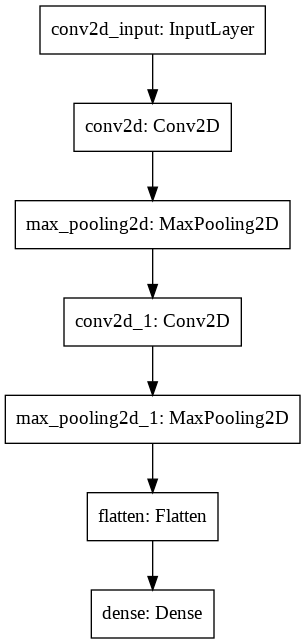

In [11]:
tf.keras.utils.plot_model(tf.model)

In [12]:
tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/12
469/469 [==============================] - 34s 4ms/step - loss: 0.7762 - accuracy: 0.7861
Epoch 2/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0986 - accuracy: 0.9718
Epoch 3/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0719 - accuracy: 0.9779
Epoch 4/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0625 - accuracy: 0.9824
Epoch 5/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0490 - accuracy: 0.9846
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0398 - accuracy: 0.9878
Epoch 8/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0385 - accuracy: 0.9879
Epoch 9/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 10/12
469/469 [==============================] - 2s 3ms/step - loss: 0.0305 - accuracy: 0.991

In [13]:
# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

index:  3911 actual y:  0 predicted y:  0
index:  8636 actual y:  1 predicted y:  1
index:  4660 actual y:  7 predicted y:  7
index:  2302 actual y:  1 predicted y:  1
index:  1831 actual y:  6 predicted y:  6
index:  850 actual y:  1 predicted y:  1
index:  7538 actual y:  7 predicted y:  7
index:  2713 actual y:  0 predicted y:  0
index:  2783 actual y:  8 predicted y:  8
index:  5469 actual y:  6 predicted y:  6
313/313 [==============================] - 1s 2ms/step - loss: 0.0400 - accuracy: 0.9878
loss:  0.04003182426095009
accuracy 0.9878000020980835
